# Challenge 6

## Challenge 3

### Metodología

In [1]:
#@title import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('https://raw.githubusercontent.com/inefable12/siderophores_database/main/Siderophore_DB.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/inefable12/siderophores_database/main/Siderophore_DB1.csv')

In [3]:
# Se unen ambos df teniendo como referencia la columna 'ID'
df = pd.merge(df1, df2, on='ID', how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Columns: 132 entries, ID to fr_phenol_noOrthoHbond
dtypes: bool(1), float64(86), int64(39), object(6)
memory usage: 226.5+ KB


In [4]:
# Se visualiza los datatype de cada columna
for d in ['bool', 'float64', 'int64', 'object']:
  dataype_columns = df.select_dtypes(d)
  print(f'{d}\t{dataype_columns.columns}')

bool	Index(['validate smiles'], dtype='object')
float64	Index(['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
       'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge',
       'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2',
       'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGLO',
       'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT',
       'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v',
       'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Kappa1', 'Kappa2',
       'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11',
       'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3',
       'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1',
       'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6',
       'SMR_VSA7', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA11

In [5]:
# Se escogen los posibles features
# Coinciden con las columnas en df2 (Siderophore_DB1.csv) con la excepción de ID
featureslist=df2.columns[1:].tolist()
print(featureslist)

['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGLO', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA11', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'TPSA', 'EState_VSA1', 'EState_VSA10

In [6]:
# Se escogen los posibles targets
# No se necesitará la data de tipo objeto ni bool para la SVM (de df1)
targetslist=df1.columns[1:].tolist()
nofeat_columns = df.select_dtypes('object').columns.tolist()+ df.select_dtypes('bool').columns.tolist()
targetslist=[x for x in targetslist if x not in nofeat_columns]
print(targetslist)

['hydroxamate', 'catecholate', 'a-hydroxycarboxylate', 'carboxylate', 'phenolate', 'citrate', 'other']


In [7]:
# Se define las filas que se utilizarán para mostrar el df ahora en adelante
cols=featureslist+targetslist

In [8]:
# Se evalúa si las columnas seleccionadas tienen problemas de datatype
df[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Columns: 125 entries, MaxEStateIndex to other
dtypes: float64(86), int64(39)
memory usage: 215.9 KB


In [9]:
df[cols].describe().T

,count,mean,std,min,25%,50%,75%,max
MaxEStateIndex,221.0,14.361458,1.306650,9.667832,13.693037,14.222851,15.424962,16.647474
MinEStateIndex,221.0,-5.557024,1.186967,-7.433673,-6.290073,-5.571034,-5.211695,-0.881916
MaxAbsEStateIndex,221.0,14.361458,1.306650,9.667832,13.693037,14.222851,15.424962,16.647474
MinAbsEStateIndex,221.0,1.244646,0.508051,0.011382,1.036932,1.280840,1.618549,2.220550
qed,221.0,0.151045,0.203659,0.007004,0.030619,0.058700,0.158075,0.881757
...,...,...,...,...,...,...,...,...
a-hydroxycarboxylate,221.0,0.104072,0.407912,0.000000,0.000000,0.000000,0.000000,2.000000
carboxylate,221.0,0.389140,0.627165,0.000000,0.000000,0.000000,1.000000,4.000000
phenolate,221.0,0.090498,0.302940,0.000000,0.000000,0.000000,0.000000,2.000000
citrate,221.0,0.099548,0.342517,0.000000,0.000000,0.000000,0.000000,2.000000


In [10]:
# Suma del recuento de objetos nulos en todas las columnas utilizadas
np.sum(pd.isnull(df[cols]).sum())

0

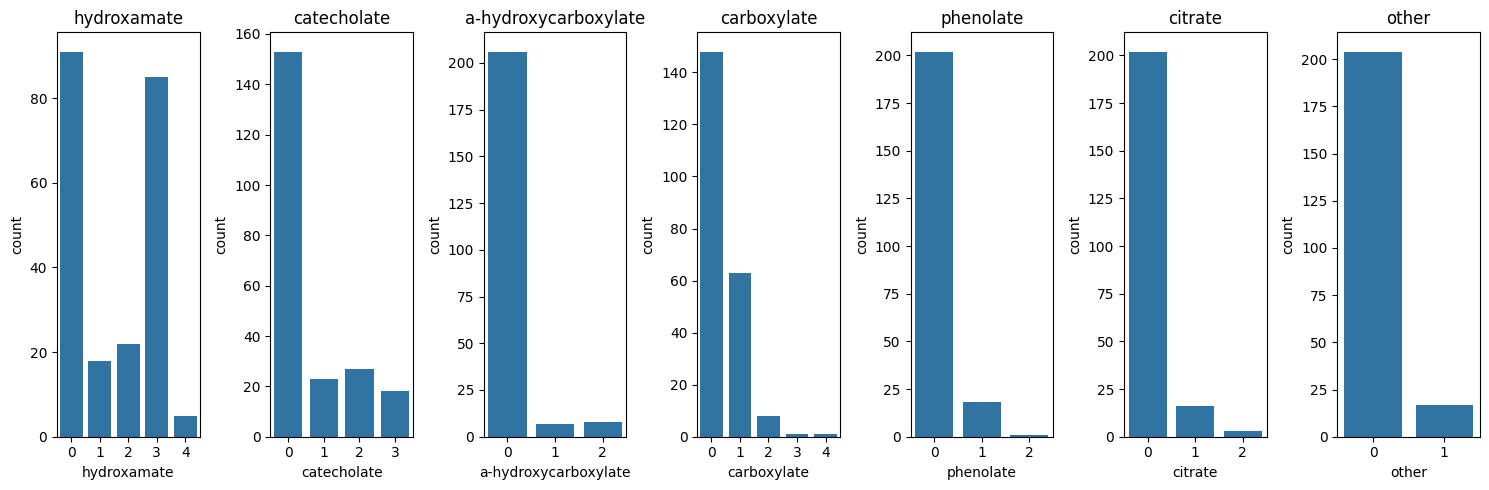

In [11]:
# Observar la distribución de los targets
fig, axes = plt.subplots(nrows=1, ncols=len(targetslist), figsize=(15, 5))

for i, column in enumerate(targetslist):
    sns.countplot(x=column, data=df[cols], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [12]:
# 'a-hydroxycarboxylate','phenolate','citrate','other' están desbalanceados, por
# lo que no serán consideradas.
notarget=['a-hydroxycarboxylate','phenolate','citrate','other']
targetslist=[x for x in targetslist if x not in notarget]
print(targetslist)

['hydroxamate', 'catecholate', 'carboxylate']


In [13]:
# Por otro lado, del resto de columnas colo se considerará la presencia o
# ausencia de los grupos quelantes, debido a que también hay un desbalance
for col in targetslist:
  df[col+'_target'] = df[col].apply(lambda x: 1 if x > 0 else x)
targetslist=[x+'_target' for x in targetslist]
print(targetslist)

['hydroxamate_target', 'catecholate_target', 'carboxylate_target']


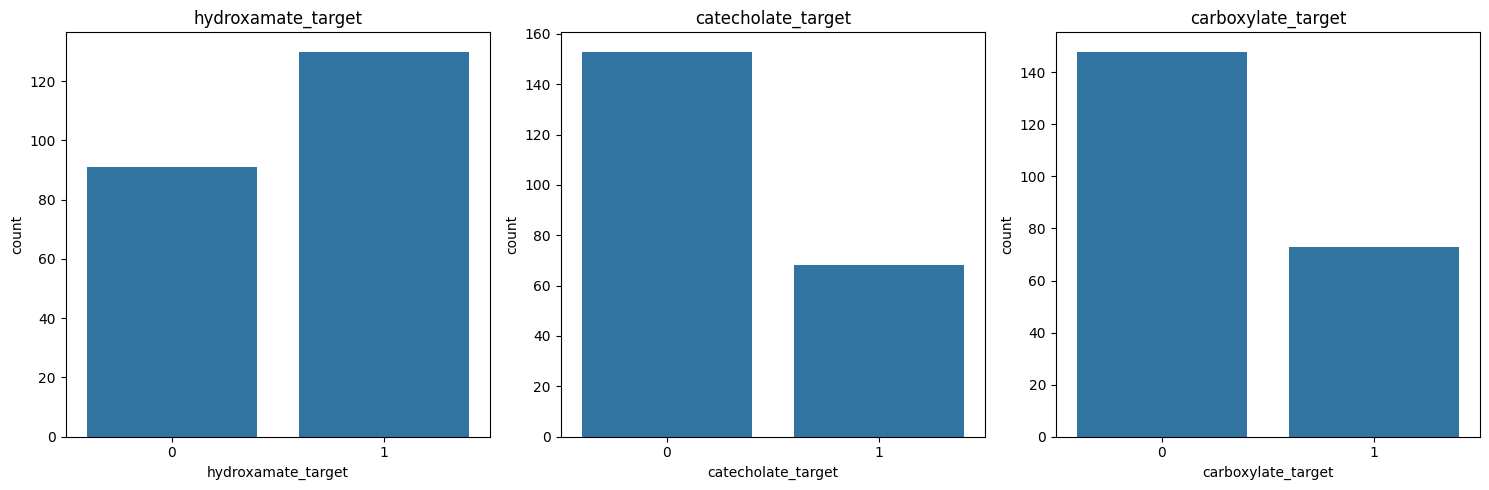

In [14]:
# Observar la nueva distribución de los targets
fig, axes = plt.subplots(nrows=1, ncols=len(targetslist), figsize=(15, 5))
for i, column in enumerate(targetslist):
    sns.countplot(x=column, data=df[targetslist], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [15]:
df_feat=df[featureslist]
df_feat.info()
df_feat.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Columns: 118 entries, MaxEStateIndex to fr_phenol_noOrthoHbond
dtypes: float64(86), int64(32)
memory usage: 203.9 KB


,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,...,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_amide,fr_benzene,fr_ester,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond
0,11.191262,-1.343472,11.191262,0.665370,0.522491,154.121,148.073,154.026609,58,0.339119,...,0,0,0,0,0,1,0,1,2,1
1,12.228676,-3.436129,12.228676,0.586755,0.522624,211.173,202.101,211.048072,80,0.322481,...,0,1,0,0,1,1,0,1,2,2
2,12.627825,-3.816337,12.627825,0.758838,0.442264,241.199,230.111,241.058637,92,0.328131,...,0,1,0,0,1,1,0,1,2,2
3,12.854441,-4.102795,12.854441,0.884463,0.468346,255.226,242.122,255.074287,98,0.328426,...,0,1,0,0,1,1,0,1,2,2
4,11.108779,-1.310880,11.108779,0.630759,0.610259,138.122,132.074,138.031694,52,0.338969,...,0,0,0,0,0,1,0,1,1,0


In [16]:
# Se hará una clasificación para cada target, es decir se intentará predecir la
# presencia o ausencia de cada grupo independientemente
df_target0=df[targetslist[0]]
df_target1=df[targetslist[1]]
df_target2=df[targetslist[2]]
df_target0.info()
df_target0.head()

<class 'pandas.core.series.Series'>
RangeIndex: 221 entries, 0 to 220
Series name: hydroxamate_target
Non-Null Count  Dtype
--------------  -----
221 non-null    int64
dtypes: int64(1)
memory usage: 1.9 KB


0    0
1    0
2    0
3    0
4    0
Name: hydroxamate_target, dtype: int64

#### Entrenamiento y predicción

In [17]:
#@title import libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

##### hydroxamate_target

In [18]:
#@title stratify, no undersampling
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target0, test_size=0.20, random_state=5,stratify=df_target0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SVC()
# Realizar validación cruzada
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

model.fit(X_train,y_train)

predictions = model.predict(X_test)

print('\nMatriz de confusión')
print(confusion_matrix(y_test,predictions))

print('\nReporte de clasificación')
print(classification_report(y_test,predictions))

Cross-validation scores: [0.94444444 0.97142857 0.94285714 0.94285714 0.94285714]
Mean cross-validation score: 0.9488888888888889

Matriz de confusión
[[19  0]
 [ 1 25]]

Reporte de clasificación
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.96      0.98        26

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



##### catecholate_target

In [19]:
#@title stratify, no undersampling
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target1, test_size=0.20, random_state=5,stratify=df_target1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SVC()
# Realizar validación cruzada
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

model.fit(X_train,y_train)

predictions = model.predict(X_test)

print('\nMatriz de confusión')
print(confusion_matrix(y_test,predictions))

print('\nReporte de clasificación')
print(classification_report(y_test,predictions))

Cross-validation scores: [0.94444444 0.97142857 0.97142857 0.91428571 1.        ]
Mean cross-validation score: 0.9603174603174602

Matriz de confusión
[[30  1]
 [ 3 11]]

Reporte de clasificación
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        31
           1       0.92      0.79      0.85        14

    accuracy                           0.91        45
   macro avg       0.91      0.88      0.89        45
weighted avg       0.91      0.91      0.91        45



##### carboxylate_target

In [20]:
#@title stratify, no undersampling
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target2, test_size=0.20, random_state=5,stratify=df_target2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SVC()
# Realizar validación cruzada
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

model.fit(X_train,y_train)

predictions = model.predict(X_test)

print('\nMatriz de confusión')
print(confusion_matrix(y_test,predictions))

print('\nReporte de clasificación')
print(classification_report(y_test,predictions))

Cross-validation scores: [0.83333333 0.82857143 0.85714286 0.91428571 0.82857143]
Mean cross-validation score: 0.8523809523809524

Matriz de confusión
[[29  1]
 [ 3 12]]

Reporte de clasificación
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        30
           1       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.91      0.88      0.90        45
weighted avg       0.91      0.91      0.91        45



## Tuning hyper-parameters

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
def print_dataframe(filtered_cv_results):
    """Pretty print for filtered dataframe"""
    for mean_precision, std_precision, mean_f1, std_f1, params in zip(
        filtered_cv_results["mean_test_precision"],
        filtered_cv_results["std_test_precision"],
        filtered_cv_results["mean_test_f1"],
        filtered_cv_results["std_test_f1"],
        filtered_cv_results["params"],
    ):
        print(
            f"precision: {mean_precision:0.3f} (±{std_precision:0.03f}),"
            f" f1: {mean_f1:0.3f} (±{std_f1:0.03f}),"
            f" for {params}"
        )
    print()

def refit_strategy(cv_results):
    """Define the strategy to select the best estimator.

    The strategy defined here is to filter-out all results below a precision threshold
    of ---, rank the remaining by f1 and keep all models with one standard
    deviation of the best by f1. Once these models are selected, we can select the
    fastest model to predict.

    Parameters
    ----------
    cv_results : dict of numpy (masked) ndarrays
        CV results as returned by the `GridSearchCV`.

    Returns
    -------
    best_index : int
        The index of the best estimator as it appears in `cv_results`.
    """
    # print the info about the grid-search for the different scores
    precision_threshold = 0.9

    cv_results_ = pd.DataFrame(cv_results)
    print("All grid-search results:")
    print_dataframe(cv_results_)

    # Filter-out all results below the threshold
    high_precision_cv_results = cv_results_[
        cv_results_["mean_test_precision"] > precision_threshold
    ]

    print(f"Models with a precision higher than {precision_threshold}:")
    print_dataframe(high_precision_cv_results)

    high_precision_cv_results = high_precision_cv_results[
        [
            "mean_score_time",
            "mean_test_f1",
            "std_test_f1",
            "mean_test_precision",
            "std_test_precision",
            "rank_test_f1",
            "rank_test_precision",
            "params",
        ]
    ]

    # Select the most performant models in terms of f1
    # (within 1 sigma from the best)
    best_f1_std = high_precision_cv_results["mean_test_f1"].std()
    best_f1 = high_precision_cv_results["mean_test_f1"].max()
    best_f1_threshold = best_f1 - best_f1_std

    high_f1_cv_results = high_precision_cv_results[
        high_precision_cv_results["mean_test_f1"] > best_f1_threshold
    ]
    print(
        "Out of the previously selected high precision models, we keep all the\n"
        "the models within one standard deviation of the highest f1 model:"
    )
    print_dataframe(high_f1_cv_results)

    # From the best candidates, select the fastest model to predict
    fastest_top_f1_high_precision_index = high_f1_cv_results[
        "mean_score_time"
    ].idxmin()

    print(
        "\nThe selected final model is the fastest to predict out of the previously\n"
        "selected subset of best models based on precision and f1.\n"
        "Its scoring time is:\n\n"
        f"{high_f1_cv_results.loc[fastest_top_f1_high_precision_index]}"
    )

    return fastest_top_f1_high_precision_index

### hydroxamate_target

In [23]:
#@title no stratify, no undersampling
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target0, test_size=0.20, random_state=5,stratify=df_target0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SVC()
# Realizar validación cruzada
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

model.fit(X_train,y_train)

predictions = model.predict(X_test)

print('\nMatriz de confusión')
print(confusion_matrix(y_test,predictions))

print('\nReporte de clasificación')
print(classification_report(y_test,predictions))

Cross-validation scores: [0.94444444 0.97142857 0.94285714 0.94285714 0.94285714]
Mean cross-validation score: 0.9488888888888889

Matriz de confusión
[[19  0]
 [ 1 25]]

Reporte de clasificación
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.96      0.98        26

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [24]:
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [10,1,1e-1,1e-2,1e-3, 1e-4,1e-5], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]

scores = ['precision', 'f1']

grid_search = GridSearchCV(
    SVC(), tuned_parameters, scoring=scores, refit=refit_strategy
)
grid_search.fit(X_train, y_train)

All grid-search results:
precision: 0.623 (±0.007), f1: 0.768 (±0.006), for {'C': 1, 'gamma': 10, 'kernel': 'rbf'}
precision: 0.642 (±0.018), f1: 0.782 (±0.013), for {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
precision: 0.869 (±0.078), f1: 0.900 (±0.022), for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
precision: 0.990 (±0.019), f1: 0.960 (±0.013), for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
precision: 0.981 (±0.038), f1: 0.940 (±0.024), for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
precision: 0.633 (±0.035), f1: 0.772 (±0.031), for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
precision: 0.591 (±0.012), f1: 0.743 (±0.009), for {'C': 1, 'gamma': 1e-05, 'kernel': 'rbf'}
precision: 0.623 (±0.007), f1: 0.768 (±0.006), for {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
precision: 0.646 (±0.019), f1: 0.785 (±0.014), for {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
precision: 0.851 (±0.051), f1: 0.902 (±0.024), for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
precision: 0.970 (±0.024), f1: 0.956 (±0.025), for {'C': 10,

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             refit=<function refit_strategy at 0x00000191D82D7E20>,
             scoring=['precision', 'f1'])

## Pipeline

In [25]:
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target0, test_size=0.20, random_state=5,stratify=df_target0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pipe.set_params(svc__C=1000,svc__gamma=1e-5,svc__kernel='rbf')

pipe.fit(X_train, y_train).score(X_test, y_test)
predictions = pipe.predict(X_test)

print('\nMatriz de confusión')
print(confusion_matrix(y_test,predictions))

print('\nReporte de clasificación')
print(classification_report(y_test,predictions))



Matriz de confusión
[[19  0]
 [ 1 25]]

Reporte de clasificación
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.96      0.98        26

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

